In [5]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import time_evolutor as te
import plotting as p

import sys
sys.path.append('/../../temp_prog/')
import tur_calculator as tc
import calc_myself as cm



In [6]:
def do_all(ti_array, initial, long_time=False):
    #------------------SETUP-------------------
    path_name = "meta1/all_values.npz"

    T_L = 25 
    T_R = 10
    V_B = 30
    eps = 50
    delta_gamma = 0.04 #0.04
    delta_epsilon = 0.04 #0.04

    INPUT = {
        'eps': eps,
        'omega': 0, 
        'u': 250, 
        'V_B': V_B,
        'gamma': 1,  
        'T_L': T_L,
        'T_R': T_R,
        'delta_gamma': delta_gamma,
        'delta_epsilon': delta_epsilon,
    }

    importlib.reload(te)
    sys, rho_ss, rho_t, I_ss, I, I_var, P, J_QH = te.calculate_paper_meta(initial, ti_array, **INPUT)
    importlib.reload(tc)
    TUR, eff_carnot, eff, sigma = tc.calculate_tur(T_L, T_R, I, I_var, J_QH, P)
    return TUR
    '''
    #plotting density matrix 
    font_size = 20
    plt.rcParams.update({'font.size': 16})  # Applies globally

    #print(rho_t[0])

    rho_0 = rho_t[0]
    rho_1 = rho_t[1]+rho_t[2]
    rho_2 = rho_t[3]

    rho_0_ss = rho_ss[0]
    rho_1_ss = rho_ss[1]+rho_ss[2]
    rho_2_ss = rho_ss[3]

    #Plot probabilities
    plt.figure()
    plt.plot(ti_array,rho_0, label = r'$P_0$')
    if long_time:
        plt.plot(ti_array[-1], rho_0_ss, '*', color = 'C0', label=r'$P_0^{ss}$')
    plt.plot(ti_array,rho_1, label = r'$P_1$')
    if long_time:
        plt.plot(ti_array[-1], rho_1_ss, '*', color = 'C1', label=r'$P_1^{ss}$')
    plt.plot(ti_array,rho_2, label = r'$P_2$')
    if long_time:
        plt.plot(ti_array[-1], rho_2_ss, '*', color = 'C2', label=r'$P_2^{ss}$')
    plt.legend()
    plt.xlabel(r' $t$', fontsize = font_size)
    plt.ylabel(r'$P$', fontsize = font_size)
    if long_time:
        plt.xscale('log')
        plt.xlim(1e-1,1e5)
    else:
        plt.xlim(0,10)
    plt.ylim(0,1)
    plt.title('Probabilities evolving in time', fontsize = font_size)
    plt.show()
    '''



In [7]:
#even initial
initial = [0.25,0.25,0.25,0.25,0,0]
ti_array = np.linspace(0,1e5, 10000)
TUR_even = do_all(ti_array, initial, long_time=True)

#uneven initial
initial = [0.75,0.08,0.02,0.15,0,0]
ti_array = np.linspace(0,1e5, 10000)
TUR_uneven = do_all(ti_array, initial, long_time=True)




~~ Re(lambda3)/re(lambda2): ~~
-1.901561344268076/-0.003365668540427343=564.8880207471603

~~ Re(lambda3)/re(lambda2): ~~
-1.901561344268076/-0.003365668540427343=564.8880207471603


In [8]:
importlib.reload(cm)
TUR_calced, _, _, _ = cm.do_all(ti_array, long_time=True)

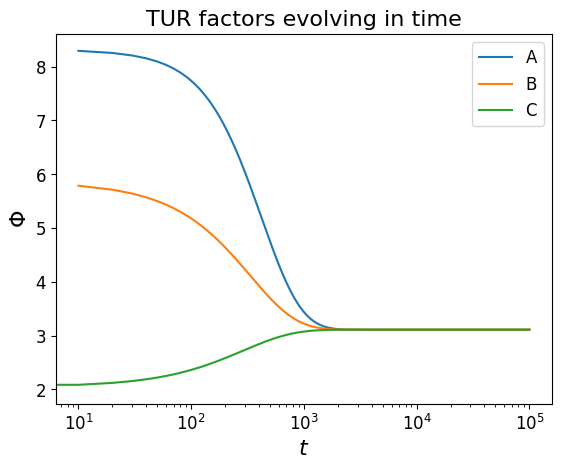

In [9]:
#plot TUR
font_size = 16
plt.rcParams.update({'font.size': 12})  # Applies globally
plt.figure()
plt.plot(ti_array, TUR_even, label='A')
plt.plot(ti_array, TUR_uneven, label='B')
plt.plot(ti_array, TUR_calced, label='C')
plt.title('TUR factors evolving in time', fontsize=font_size)
plt.xlabel(r'$t$', fontsize=font_size)
plt.ylabel(r'$\Phi$', fontsize=font_size)
plt.xscale('log')

plt.legend()

In [10]:
#plotting particle current
font_size = 16
plt.rcParams.update({'font.size': 12})  # Applies globally
plt.plot(ti_array,I, label = 'current')
plt.plot(ti_array[-1], I_ss, '*', color = 'C0', label='stationary current')

plt.legend()

plt.xlabel(r' $t$', fontsize = font_size)
plt.ylabel(r'$I(t)$', fontsize = font_size)
#plt.xscale('log')
plt.xlim(0,10)
#plt.ylim(-0.1, 0.1)
plt.title('Current evolving in time', fontsize = font_size)

plt.show()


NameError: name 'I' is not defined

49.96 50.04


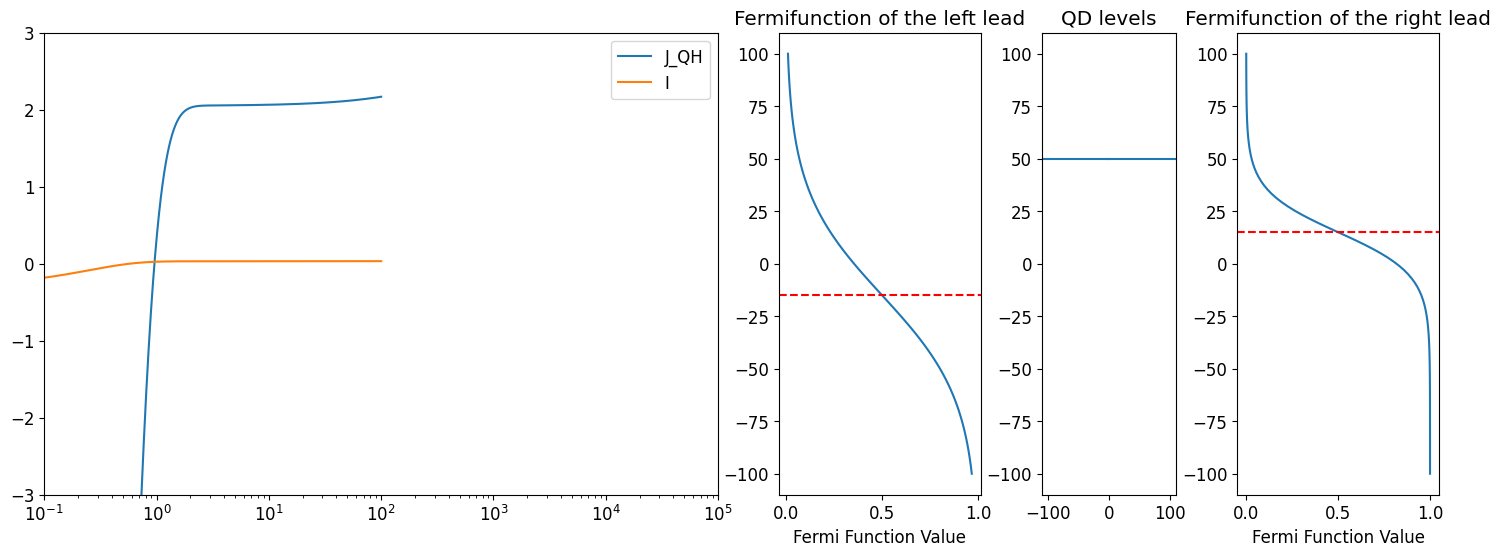

In [ ]:
epsilons = np.linspace(-100,100,100)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6), gridspec_kw={'width_ratios': [10, 3, 2, 3]}) 

ax1.plot(ti_array, J_QH, label='J_QH')
ax1.plot(ti_array, I, label='I')
ax1.set_xscale('log')
ax1.set_xlim(1e-1,1e5)
ax1.set_ylim(-3, 3)

ax1.legend()

mu_L = -V_B/2       
mu_R = V_B/2 
eps1 = eps-delta_epsilon
eps2 =eps+delta_epsilon
print(eps1, eps2)

importlib.reload(p)
p.plot_fermi_function(epsilons, mu_L, T_L, ax2, "Fermifunction of the left lead")
p.plot_double_qd_leves(epsilons, eps1, eps2, ax3, 'QD levels')
p.plot_fermi_function(epsilons, mu_R, T_R, ax4, "Fermifunction of the right lead")

plt.show()

In [ ]:
print('I', I)
print('P', P)
print('I_var', I_var)
print('heat current: ', J_QH)
print('sigma: ', sigma)
print('eff: ', eff)
print('TUR', TUR)

print('Min-TUR: ',np.nanmin(TUR))
print('TUR at: ', TUR[100])

I [-0.2871434  -0.27459769 -0.26254466 ...  0.03336238  0.03336253
  0.03336268]
P [-8.61430205 -8.23793074 -7.87633967 ...  1.00087125  1.00087581
  1.00088037]
I_var [-40.05497196 -36.80001812 -33.80161688 ...   0.19197938   0.19197799
   0.19197661]
heat current:  [-93.66221749 -89.90570484 -86.2965481  ...   2.1685126    2.16852248
   2.16853236]
sigma:  [       nan        nan        nan ... 0.03002363 0.03002377 0.0300239 ]
eff:  [       nan        nan        nan ... 0.46154735 0.46154735 0.46154735]
TUR [       nan        nan        nan ... 5.17849861 5.17843772 5.17837684]
Min-TUR:  -114518.55707962977
TUR at:  -23.250031536852127


Text(0.5, 1.0, 'Current')

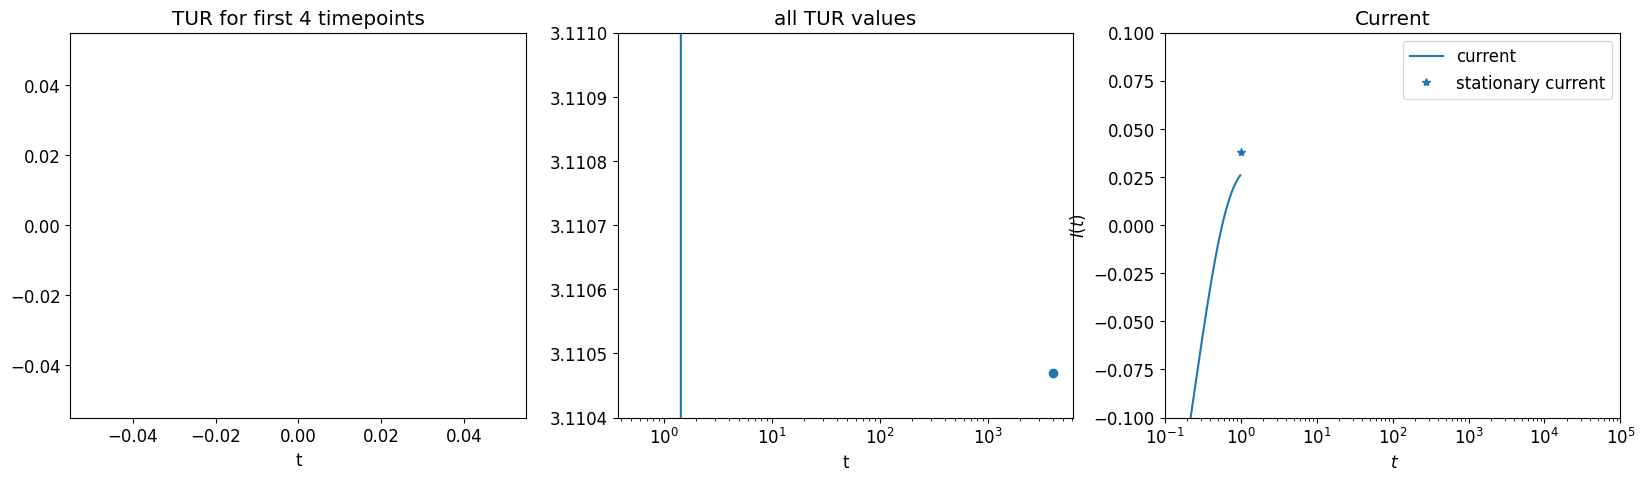

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].scatter(ti_array[0:4], TUR[0:4])
axes[0].set_title('TUR for first 4 timepoints')
axes[0].set_xlabel('t')

axes[1].plot(ti_array, TUR)
axes[1].set_title('all TUR values')
axes[1].set_xlabel('t')
axes[1].set_xscale('log')
axes[1].set_ylim(3.1104, 3.111)
axes[1].scatter(4000, 3.11047)


axes[2].plot(ti_array[0:100],I[0:100], label = 'current')
axes[2].plot(ti_array[100], I_ss, '*', color = 'C0', label='stationary current')
axes[2].set_xscale('log')
axes[2].set_xlim(1e-1,1e5)
axes[2].set_ylim(-0.1, 0.1)

axes[2].legend()

axes[2].set_xlabel(r' $t$')
axes[2].set_ylabel(r'$I(t)$')
axes[2].set_title('Current')


In [ ]:
print(np.min(TUR))
print(TUR[0])

nan
nan
